In [38]:
import os

import requests
from requests import Response

import pandas as pd

from time import sleep
from bs4 import BeautifulSoup

## 카카오톡 크롤링 함수 불러오기

In [33]:
def get_genre_url(code):
    genre_url = f"https://gateway-kw.kakao.com/decorator/v1/decorator/contents/{code}"
    # headers = {
    # 'accept-encoding': 'gzip, deflate, br',
    # 'accept-language': 'ko',
    # 'cookie': 'webid=7f21641f2bbd4c8f9af86d6a211be9d3; webid_ts=1653369352348; _kadu=siXZVdFTz5t_Qn9k_1657018568227; TIARA=E5LCJI_ZlE4MWqrCUUL8TobbA7yC.GcgRfwqr.8cXrnr8ayRx2IosGXe-cnpqd2c-KNtewZjukzYpK7qiyzafPuiGwrKxMOUYUxddSNEePo0; theme=dark; _kp_collector=KP.3859991296.1659595466116; _gcl_au=1.1.1256564681.1659595467; _fbp=fb.1.1659595467566.1992267394; _kptid=2606ff7d55eb4817b9f95bcae29fd01a; _gid=GA1.2.917645428.1659970395; _kawlt=p6AvPcB7VhEsx1uxoYSADKuWTbew1YZlkN2unHQOEy4FtqIFSZydN4IxZuUoggK3PjcN_R_5UFVSbU7dZGoS78YIDvLBvg7GIpoixDUJN95j_Wx3yZHpFZSIwCnwlkae; _kawltea=1660081117; _karmt=Hb7pXFTE3YJdAUu4iaHEHPvRrAwksBtbIanRjNiN0Ei749Lp55dsibfxpa0KS_od; _karmtea=1660091917; _kahai=ab97e19c37fa5fb1fae98fde30b632fb1d64e234f891aa4e8908a4655b95a265; _ga=GA1.2.529977311.1657242742; _ga_80D69HE0QD=GS1.1.1660101064.11.1.1660101254.0; _T_ANO=PuUBE4/x9cSNG6hqzYsH9GvBXc7Kfnh1X9Vb3KFFA7VdTpCU3P4qKQ/xtv/nHZpmQe1/SpOkioMZ8mT6NdhEYLjLsk0tqJw+dzkzRA4vC85qWEWMIfpSUBk+ulz+TTINl4fSPnGPCxnsGjOKiwVj5Rb8/d9A1HKMnkmWMVsa2uJpKHltLClx8KIZwZPRzzO6D7uW09feGswdWHVyf1G8CISZf5uLZDBJP7gJ86aPK25o1/gQJlgbo+Ch/Zyre2vRwdlazp7+fH6rUWjNnZnSf00WLpsArSnabmP2xMVhq3bHCqPhyKi3VvA5eatIYF/sK7PZYVocRQlr/4+U3KGNcA==',
    # 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
    # }
    g_response = requests.get(genre_url)
    g_data = g_response.json()
    return g_data

In [34]:
def crawling(code):
    """
    returns view, like, title when input webtoon id
    """
    g_data = get_genre_url(code)  
    view = int(g_data["data"]["statistics"]["viewCount"])
    like = int(g_data["data"]["statistics"]["likeCount"])
    title = g_data["data"]["title"]
    
    return view, like, title

In [35]:
PATH = './input/'
df_kakao_webtoon = pd.read_csv(PATH + 'kakao_webtoon.csv')

In [40]:
view_df = []
like_df = []
title_df = []

for id in df_kakao_webtoon.id:
    view, like, title = crawling(id)
    view_df.append(view)
    like_df.append(like)
    title_df.append(title)

KeyboardInterrupt: 

In [ ]:
df_kakao_webtoon2 = pd.DataFrame({"Title": title_df, "Like" : like_df, "View": view_df})

In [ ]:
import time
t = time.localtime()

df_kakao_webtoon2.to_csv("kakao_webtoon_{0:02d}{1:02d}.csv".format(t.tm_mon, t.tm_mday), index=False)

## 필요한 데이터 불러오기 및 전처리

In [ ]:
# 앞으로 필요한 제목, 좋아요, 조회수만 가져오기
df_kakao_webtoon = df_kakao_webtoon[['title','like','view']]

In [ ]:
df_kakao_webtoon['like'] = df_kakao_webtoon['like'].str.strip('['']').astype(int)
df_kakao_webtoon['view'] = df_kakao_webtoon['view'].str.strip('['']').astype(int)

In [ ]:
df_kakao_webtoon.rename(columns ={'like' : 'view', 'view' : "like"}, inplace=True)

In [ ]:
df_view_diff = df_kakao_webtoon2['View'] - df_kakao_webtoon['view']
df_view_diff.describe()

count      1426.000000
mean      14879.528050
std       41702.380446
min          44.000000
25%        1285.750000
50%        4229.500000
75%       12289.250000
max      970368.000000
dtype: float64

In [ ]:
df_like_diff = df_kakao_webtoon2['Like'] - df_kakao_webtoon['like']
df_like_diff.describe()

count     1426.000000
mean       427.011921
std       1113.745915
min          0.000000
25%          8.250000
50%         79.000000
75%        385.000000
max      16451.000000
dtype: float64

In [ ]:
df_diff = pd.DataFrame({"title": df_kakao_webtoon['title'], "view_diff": df_view_diff, "like_diff":df_like_diff})
df_diff
del df_like_diff, df_view_diff

,title,view_diff,like_diff
0,미생,28605,522
1,바니와 오빠들,104458,2027
2,무지개다리 파수꾼,34536,754
3,뱀파이어님의 대리식사,23300,447
4,대사형 선유,32770,1230
...,...,...,...
1421,진심이 닿다,1208,6
1422,드림사이드,1645,33
1423,김 비서가 왜 그럴까,5103,66
1424,더스크 하울러,5135,19


In [ ]:
# 네이버 평점 데이터 불러오기
df_naver = pd.read_csv(PATH + "naver_webtoon_final.csv")

<AxesSubplot:>

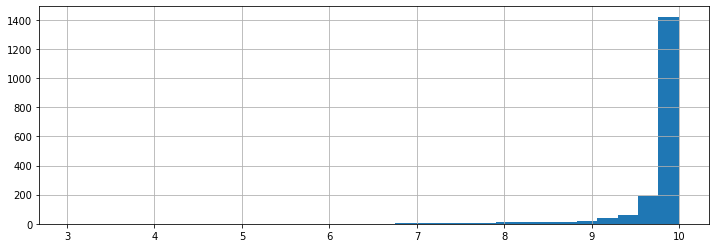

In [ ]:
df_naver["Score(recent 10)"].hist(figsize=(12,4), bins=30)

## 카카오 정보를 이용하여 네이버 평점과 비슷한 점수 계산하는 함수 짜기

In [ ]:
# 네이버 평점별로 전체의 몇퍼센트를 차지하는지 확인
df_percent = df_naver.groupby("Score(recent 10)").count()[['Title']].div(df_naver.shape[0]).sort_values(ascending=False, by="Score(recent 10)")
df_percent

,Title
Score(recent 10),
9.990000,0.004918
9.986667,0.013115
9.983333,0.004372
9.983333,0.010929
9.980000,0.001639
...,...
3.593333,0.000546
3.586667,0.000546
3.396667,0.000546


In [ ]:
# 중복 웹툰 제거 후 단기 조휘수 순으로 정렬
df_diff.drop_duplicates(subset=['title'],inplace=True)
df_diff = df_diff.sort_values("view_diff",ascending=False)
df_diff

,title,view_diff,like_diff
417,창백한 말,970368,6861
786,십이야,337590,137
187,최강왕따,324821,9307
107,최강왕따,324793,9307
573,은밀하게 위대하게,317294,176
...,...,...,...
295,울화통 고등학교,105,1
775,기세기세2,102,0
498,마애(磨崖),71,0
856,커피와 하루 the start,63,0


In [ ]:
# 카카오 웹툰의 평점이 네이버 웹툰의 평점과 같은 분포를 가지게 점수를 부여한다
per_sum = 0
per_list = []
for per in df_percent.values:
    per_sum += per
    num = round(int(df_diff.shape[0]*per_sum))
    per_list.append(num)

per_list2 = []
for i in range(len(per_list)):
    
    if i == 0:
        per_list2.append(per_list[i])
    else:
        per_list2.append(per_list[i]-per_list[i-1])

In [ ]:
kakao_score = []

for i in range(len(per_list)):
    for j in range(per_list2[i]):
        kakao_score.append(df_percent.index[i])
kakao_score.append(df_percent.index[-1])


,title,view_diff,like_diff
0,미생,28605,522
1,바니와 오빠들,104458,2027
2,무지개다리 파수꾼,34536,754
3,뱀파이어님의 대리식사,23300,447
4,대사형 선유,32770,1230
...,...,...,...
1421,진심이 닿다,1208,6
1422,드림사이드,1645,33
1423,김 비서가 왜 그럴까,5103,66
1424,더스크 하울러,5135,19


In [ ]:
df_diff['score']=kakao_score
df_diff

## 만들어진 카카오 데이터 프레임에 평점 합치기

In [ ]:
df_diff['id'] = 0
for ind in df_diff.index:
    df_diff['id'][ind] = df_kakao_webtoon.id.loc[ind]

df_diff

C:\Users\Chalie\AppData\Local\Temp/ipykernel_16972/4183000213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['id'][ind] = kakao_id.loc[ind]


,title,view_diff,like_diff,score,id
417,창백한 말,970368,6861,9.990000,783
786,십이야,337590,137,9.990000,865
187,최강왕따,324821,9307,9.990000,2942
573,은밀하게 위대하게,317294,176,9.990000,529
1115,남편을 내 편으로 만드는 방법,297857,9546,9.990000,2954
...,...,...,...,...,...
295,울화통 고등학교,105,1,3.770000,2512
775,기세기세2,102,0,3.586667,980
498,마애(磨崖),71,0,3.396667,1834
856,커피와 하루 the start,63,0,3.203333,751


In [ ]:
df_diff.to_csv('kakao_webtoon_scoring.csv', index=False)

In [ ]:
pd.read_csv('kakao_webtoon_scoring.csv')

,title,view_diff,like_diff,score,id
0,창백한 말,970368,6861,9.990000,783
1,십이야,337590,137,9.990000,865
2,최강왕따,324821,9307,9.990000,2942
3,은밀하게 위대하게,317294,176,9.990000,529
4,남편을 내 편으로 만드는 방법,297857,9546,9.990000,2954
...,...,...,...,...,...
1404,울화통 고등학교,105,1,3.770000,2512
1405,기세기세2,102,0,3.586667,980
1406,마애(磨崖),71,0,3.396667,1834
1407,커피와 하루 the start,63,0,3.203333,751
